In [1]:
# this script is to evaluate all of the villar x roadmap x species sequence alignments without having to run the entire method2_v1,2,3 scripts

import os, sys
import pandas
import glob
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('seaborn-deep')
today = datetime.date.today()
now = today

In [2]:
roadmap_path = "/dors/capra_lab/users/fongsl/roadmap/stringent/"
result_path = "%sresults/" %roadmap_path
os.chdir(result_path)

In [3]:
###### HISTOGRAMs FUNCTION ##########3
def histogram(data, bins, datatype, labels):
    data, bins, bars = plt.hist(data, bins, alpha = 0.7, normed= False, label = labels)

    plt.xticks(np.arange(0, len(bins), 1))
   
    plt.xlabel("Num. Species \n %s Enhancers" % datatype)
    plt.ylabel("Num. hVillar Enhancers")
    plt.title("Abs. Number Broadly Active Enhancers \n%s In Other Species" % datatype)
    plt.legend()

    for i in data:
        val = 0
        for j in i:
            plt.annotate(str(j).split('.')[0], xy =(val+0.5, j+10))
            val = val +1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig("%splot_hist_abs_%s.pdf" %(result_path, datatype))
    plt.show()
    plt.close()

In [4]:
##### read in dataframe #####
short_vrs = pandas.read_csv("%sshort_villar_x_roadmap_x_species_overlap.csv" %result_path, sep = '\t')

vrs = short_vrs

q25= int(vrs["sum"].quantile(0.25))
q50 = int(vrs["sum"].quantile(0.50))
q75 = int(vrs["sum"].quantile(0.75))
q90 = int(vrs["sum"].quantile(0.90))
 # 'a' = 'all'
 # 'h' = 'human' specific enhancers
 # 'c' = 'conserved' enhancers
 # 'd' = 'dataset'

 #'act' = active
 #'aln' = alignable
short_vrs_90 = short_vrs.loc[short_vrs["90_percentile"] >0]

dtype = ['act_sp', 'aln_sp', 'hq_act_sp', 'hq_aln_sp']

In [5]:
item = dtype[2]
print(item)

hq_act_sp


In [6]:
bins = np.arange(short_vrs[item].max())

if item == 'act_sp':
    title = "Active"
elif item == 'aln_sp':
    title =  "Alignable"
elif item == 'hq_act_sp':
    title =  "Active-HQ"
elif item == 'hq_aln_sp':
    title =  "Alignable-HQ"
else:
    title = "Alignable, not Active"

In [7]:
print(short_vrs[item].max())
print(short_vrs[item].min())

print(bins)

9
0
[0 1 2 3 4 5 6 7 8]


In [ ]:
# Villar enhancers overlapping roadmap
sum_item = short_vrs[item].loc[short_vrs["sum"]>0] # PLOTTED

#90th% of enhancers
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

short_vrs.hq_act_sp.plot(kind='bar', color='red', ax=ax, width=width, position=1)
short_vrs_90.hq_act_sp.plot(kind='bar', color='blue', ax=ax, width=width, position=0)

ax.set_ylabel('Count')
#ax2.set_ylabel('Price')

plt.show()

#sum_item_90 =  short_vrs_90[item].loc[short_vrs_90["sum"]>0] # PLOTTED
#short_vrs[item].value_counts().sort_index().plot.bar()
#plt.show()
#short_vrs_90[item].value_counts().sort_index().plot.bar()
#plt.show()

In [29]:
print(type(sum_item_90)

26088     6
26089    10
26090     0
26091    10
26092     5
26093     2
26094    10
26095    10
26096     7
26097    10
26098     9
26099    12
26100    12
26101    10
26102     0
26103     9
26104    10
26105    18
26106     3
26107     0
26108     8
26109    10
26110     8
26111     8
26112     3
26113     7
26114    10
26115    10
26116    12
26117     2
         ..
29147    10
29148     1
29149    11
29150     7
29151    10
29152     3
29153     0
29154    10
29155     0
29156    10
29157    10
29158     1
29159     7
29160     0
29161     0
29162     6
29163    10
29164    10
29165     0
29166     5
29167    10
29168     0
29169     0
29170     0
29171     2
29172    10
29173    10
29174    10
29175    10
29176    10
Name: aln_sp, Length: 3089, dtype: int64


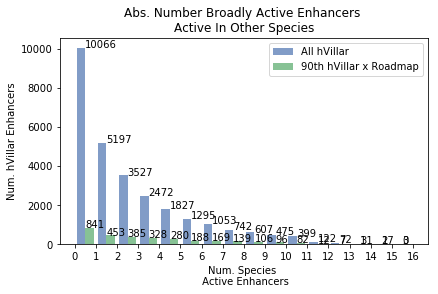

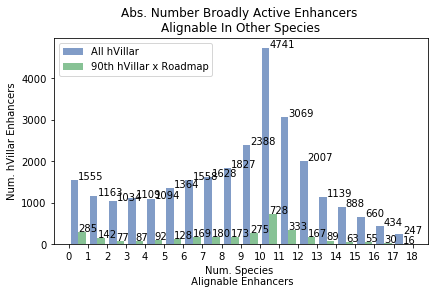

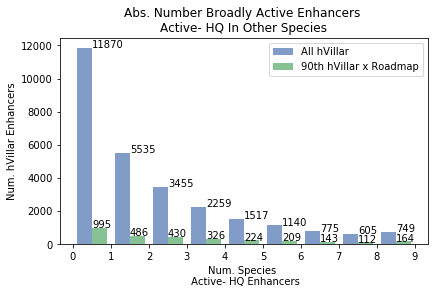

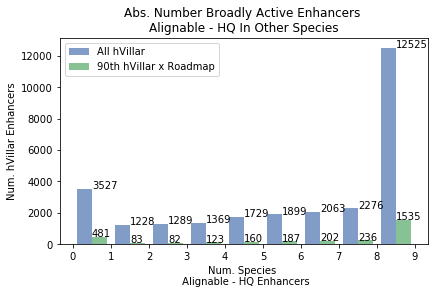

In [9]:
for item in dtype:
    bins = np.arange(short_vrs[item].max()+1)

    if item == 'act_sp':
        title = "Active"
    elif item == 'aln_sp':
        title =  "Alignable"
    elif item == 'hq_act_sp':
        title =  "Active-HQ"
    elif item == 'hq_aln_sp':
        title =  "Alignable-HQ"
    else:
        title = "Alignable, not Active"
        
    # Villar enhancers overlapping roadmap
    sum_item = short_vrs[item].loc[short_vrs["sum"]>0] # PLOTTED
    
    #90th% of enhancers
    sum_item_90 =  short_vrs_90[item].loc[short_vrs_90["sum"]>0] # PLOTTED
    
    ############# PLOT HISTOGRAMs ############

    data = [sum_item, sum_item_90]

    labels = ["All hVillar", "90th hVillar x Roadmap"] # list of the labels of the data

    histogram(data, bins, title, labels)